# Using the CRISP-DM Method for MLN 601 Machine Learning
# Assessment 2: Classification 







# 1. Stage One - Determine Business Objectives and Assess the Situation  <a class="anchor"></a>
The traditional process of winemaking relies heavily on subjective, time-consuming and expensive sensory analysis through human experts to certify quality. This assessment often occurs at the final stage of production highlighting significant financial risk if a batch is deemed unsatisfactory (Nebot et al., 2015). This project confronts this challenge by leveraging machine learning to create a proactive and data-driven quality control system.


The objective of this project is to develop a robust binary classification model capable of predicting wine quality with high accuracy. The analysis will utilize the well-regarded Wine Quality dataset from the UCI Machine Learning Repository which contains detailed physicochemical measurements. To frame this as a classification problem, the original quality score (ranging from 0 to 10) is transformed into a categorical variable such as wines with a score below 6 are labeled as 'low' quality (1), and those with a score of 6 or above are labeled as 'high' quality (0).


By training prediction algorithms on this data, the analysis aims to uncover the key chemical indicators that distinguish high-quality wine from its lower-quality counterparts. The ultimate value of the resulting model will be measured by its predictive power and assessed through rigorous evaluation metrics like accuracy, precision, recall and AUC-ROC curve. A successful model would provide winemakers with an objective tool to forecast quality early, enabling timely interventions and minimizing the risk of costly production failures.



## 1.1 Success Criteria
The success criteria for this project is fundamentally tied to the statistical power and reliability of the classification model. To ensure the final model is robust enough for practical application, a competitive evaluation of multiple algorithms and parameter sets will be conducted. The "champion" model will be selected based on its superior performance against two specific critical metrics:


**Primary Metric (F1-Score):** An F1-Score of $ \ge 0.70 $ for the 'low' quality (1) class is the most critical hurdle. This metric is chosen because it effectively manages the business trade-offs. A False Negative (failing to detect a low-quality batch) is the most costly error potentially leading to wasted resources and reputational damage. A False Positive (flagging a good batch for review) is less costly but still inefficient. The F1-Score ensures the model finds an optimal balance by maximizing the detection of bad batches while minimizing unnecessary interventions.


**Overall Performance (AUC-ROC):** An AUC-ROC score of $ \ge 0.80 $ is required to confirm the generalization capability of the model. This metric provides a holistic assessment of how well the model can distinguish between high and low-quality wines across all possible decision thresholds. A high AUC value reflects that the model has discovered important and underlying trends in the data rather than an ability to perform well at only a particular and arbitrary cutoff value.


The model with the highest F1-Score among the considered models that also exceeds the minimum level of AUC-ROC will be considered as the best solution. After selecting the champion model based on its performance, the next critical step is to analyze its interpretability by extracting feature importance. This activity considers the variables of physicochemistry one by one and then ranks the variables based on their contribution to the final quality prediction. Success in this case implies providing the best 3-5 variables that always generate a classification of a wine. For example, the model might reveal that low alcohol content combined with high volatile acidity are the most powerful predictors of a "low quality" rating. This elevates the model from a simple predictive tool to a diagnostic system. It gives winemakers a fine-grained and data-driven answer to consider a batch is at risk, so that they can target intervention actions on specific chemical characteristics and eventually improve the production process end to end.

## 1.2 Assess the Current Situation<a class="anchor"></a>

This project is supported by a well-defined set of resources ensuring a smooth and effective workflow from data analysis to final reporting.
* **Personnel and Research**
The project will be executed by Md. Arifuzzaman Munaf, a postgraduate student specializing in Advanced Artificial Intelligence. This role encompasses responsibility for the entire project lifecycle including data preprocessing, exploratory analysis, model development, rigorous evaluation, and final documentation. The analysis will be supplemented by existing academic literature and research that are primarily sourced through Google Scholar to ground the project in established methodologies.


* **Data Source**
The analysis will utilize the renowned Wine Quality dataset from the UCI Machine Learning Repository. This dataset is composed of two separate files for red and white wine varieties containing 1,599 and 4,898 samples respectively. Each sample is described by 11 physicochemical attributes (e.g., fixed acidity, alcohol) and a single quality score. The data is well-structured, complete and contains no missing values(Cortez et al., 2009).


* **Computational Environment**
All development and analysis will primarily take place within Google Colab, a cloud-based platform that provides free access to significant computational resources including ample RAM (≈12.5 GB) and optional GPU/TPU hardware acceleration for demanding tasks. Google Drive will be integrated for seamless data storage and access. A local M3-powered device with 16 GB of RAM will serve as a supplementary resource for offline development and debugging.


* **Software & Libraries**
   The project will be implemented in Python (v3.11.13) which is the default kernel of colab and python(v3.12.2) will be used for offline debugging. The other computing 
    stack will include:
   - **Data Manipulation**: pandas and numpy for efficient data handling.
   - **Visualization**: matplotlib and seaborn for exploratory data analysis.
   - **Machine Learning Models**: scikit-learn for building the modeling pipeline and XGBoost and LightGBM for implementing advanced gradient boosting algorithms to maximize predictive performance.
   - Version control will be managed using GitHub to ensure a reproducible and well-documented workflow.




# 2. Stage  Two - Data Understanding <a class="anchor"></a>

This project utilizes the Wine Quality dataset from the UCI Machine Learning Repository containing 1,599 red and 4,898 white Portuguese wine samples. The data is provided as two clean CSV files (winequality-red.csv, winequality-white.csv) with identical schemas and no missing values.

Each sample is described by 11 physicochemical input variables and a single sensory quality score rated on a scale of 0 to 10. The input features are:
* fixed acidity
* volatile acidity 
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol

The dataset was originally published by Cortez et al. (2009). This dataset is now a standard machine learning benchmark for classification tasks due to its real-world applicability and rich feature set. <br>

The dataset can be found in -
- UCI Machine Learning Repository : https://archive.ics.uci.edu/dataset/186/wine+quality
- Kaggle : https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

## 2.1 Initial Data Acquisition <a class="anchor"></a>
To streamline the development process and ensure consistent data access, the dataset was downloaded from the UCI Machine Learning Repository and rehosted on a dedicated GitHub repository. This strategy avoids the need for repeated file uploads manually to the Google Colab environment.

The data is provided in a comma-separated value (CSV) format with separate files containing the physicochemical properties and quality ratings for red and white wines. For this project, the analysis will focus on both on red wine and white data combining them into a single CSV file.

The datasets are publicly accessible at the following locations:<br>
* **Red Wine:** https://raw.githubusercontent.com/Arifuzzaman-Munaf/dataset/main/winequality-red.csv
* **White Wine:** https://raw.githubusercontent.com/Arifuzzaman-Munaf/dataset/main/winequality-white.csv


Several key Python libraries are used in this project:
* NumPy for numerical computations
* Modin for fast, parallelized pandas operations  
* Matplotlib and Seaborn for data visualization
* Wget to programmatically download datasets
* missingno is used to visualize the missing data in the dataset

In [1]:
# Import Libraries Required
!pip3 -q install modin
!pip3 -q install matplotlib
!pip3 -q install numpy
!pip3 -q install seaborn
!pip3 -q install wget


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3.12 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3.12 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3.12 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3.12 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3.12 -m pip install --upgrade pip


In [2]:
import modin.pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

In [3]:
!mkdir -p dataset # create a directory to store the dataset files

# download the files from the URL to the dataset directory
!wget -q -O dataset/winequality-red.csv "https://raw.githubusercontent.com/Arifuzzaman-Munaf/dataset/main/winequality-red.csv"
!wget -q -O dataset/winequality-white.csv "https://raw.githubusercontent.com/Arifuzzaman-Munaf/dataset/main/winequality-white.csv"

In [4]:
# display the max rows and columns
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

# Read the red and white wine datasets from CSV files, using semicolon as separator
df_r = pd.read_csv('dataset/winequality-red.csv', sep=';')
df_w = pd.read_csv('dataset/winequality-white.csv', sep=';')

# Combine the two datasets into a single DataFrame
df = pd.concat([df_r, df_w], ignore_index=True)

# Shuffle the dataset and reset the index
# random_state is used to ensure reproducibility of the shuffle
# frac=1 means shuffle the entire dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows of the combined DataFrame
df.head()

2025-08-01 17:15:17,875	INFO worker.py:1917 -- Started a local Ray instance.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6


In [5]:
# Convert the quality score to a binary values
df['quality'] = df['quality'].apply(lambda x: 1 if x < 6 else 0)

## 2.2 Describe Data <a class="anchor"></a>

In [6]:
# Display the first 10 rows of the dataset
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,0
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,1
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,0
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,0
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,0
5,7.2,0.53,0.14,2.1,0.064,15.0,29.0,0.99323,3.35,0.61,12.1,0
6,7.5,0.27,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,1
7,6.8,0.11,0.27,8.6,0.044,45.0,104.0,0.99454,3.20,0.37,9.9,0
8,9.0,0.44,0.49,2.4,0.078,26.0,121.0,0.99780,3.23,0.58,9.2,1
9,7.1,0.23,0.30,2.6,0.034,62.0,148.0,0.99121,3.03,0.56,11.3,0


The 'quality' column has been converted into binary class leading the dataset suitable for binary classification problem. If the quality value is less than 6, the wine sample has been considered as bad and any value equal or greater than 6 depicts the good quality. According to this logic, the quality value of 1 is considered as a bad sample and 0 represents a good sample.



In [7]:
# show the columns of the dataset
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
rows, columns = df.shape
print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 6497 rows and 12 columns.


In [9]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

It is clear from the previous cells that the combined dataset contains **6497** rows and **12** columns(11 features, 1 target). Moreover, all the columns in the dataset contain numerical values where feature columns hold floating values and target column('quality') holds integer value(0/1).


In [10]:
# display the descriptive statistics of the dataset 
# transpose the dataframe to display the statistics in a more readable format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


**Key observations:** <br>

**No Missing Data:** The count is uniform across all columns confirming the dataset is complete.

**Wide Intervals and Scales:** The features span vastly different intervals and scales. For instance, `alcohol` ranges from 8.0 to 14.9 while `residual sugar` has a much larger interval of 0.6 to 65.8 and `total sulfur dioxide` has an interval of [6.0, 440.0]. This variance underscores the need for feature scaling before modeling.

**Skewed Distributions:** Features like `residual sugar` show a significant difference between the mean (5.44) and the median (3.00) suggesting a right-skewed distribution with high-value outliers.

**Binary Target:** The quality variable has a minimum of 0 and a maximum of 1 confirming it has been transformed into a binary classification target.

In [11]:
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [12]:
# display the first 30 rows of the dataset
# use the light_palette function to create a color map
# use the style.background_gradient function to apply the color map to the dataframe
cm = sns.light_palette("green", as_cmap=True)
df.head(30).style.background_gradient(cmap=cm) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.000000,0.170000,0.740000,12.800000,0.045000,24.000000,126.000000,0.994200,3.260000,0.380000,12.200000,0
1,7.700000,0.640000,0.210000,2.200000,0.077000,32.000000,133.000000,0.995600,3.270000,0.450000,9.900000,1
2,6.800000,0.390000,0.340000,7.400000,0.020000,38.000000,133.000000,0.992120,3.180000,0.440000,12.000000,0
3,6.300000,0.280000,0.470000,11.200000,0.040000,61.000000,183.000000,0.995920,3.120000,0.510000,9.500000,0
4,7.400000,0.350000,0.200000,13.900000,0.054000,63.000000,229.000000,0.998880,3.110000,0.500000,8.900000,0
5,7.200000,0.530000,0.140000,2.100000,0.064000,15.000000,29.000000,0.993230,3.350000,0.610000,12.100000,0
6,7.500000,0.270000,0.310000,17.700000,0.051000,33.000000,173.000000,0.999000,3.090000,0.640000,10.200000,1
7,6.800000,0.110000,0.270000,8.600000,0.044000,45.000000,104.000000,0.994540,3.200000,0.370000,9.900000,0
8,9.000000,0.440000,0.490000,2.400000,0.078000,26.000000,121.000000,0.997800,3.230000,0.580000,9.200000,1
9,7.100000,0.230000,0.300000,2.600000,0.034000,62.000000,148.000000,0.991210,3.030000,0.560000,11.300000,0


The first 30 samples of the wine dataset were visually inspected using a green gradient heatmap. Higher values appear in darker green helping highlight feature importance at a glance. Notably, high-quality wines (quality = 0) consistently show higher alcohol content and moderate sulphate levels, while lower-quality(quality=1) wines tend to have higher volatile acidity in most cases. Other variables like citric acid, residual sugar and density exhibit less consistent trends indicating they may have weaker or more complex relationships with wine quality.

## 2.3 Verify Data Quality <a class="anchor"></a>

## 2.3.1 Data Imputation
In previous steps, it was already verified that the dataset contained no missing or null values. But there should be another verification for further confirmation.

In [13]:
print("Total number of missing values in the dataset:")

# display the total number of missing values in the dataset
# use the isnull function to check for missing values
pd.DataFrame(df.isnull().sum(), columns=["total"])

Total number of missing values in the dataset:


,total
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


<Axes: >

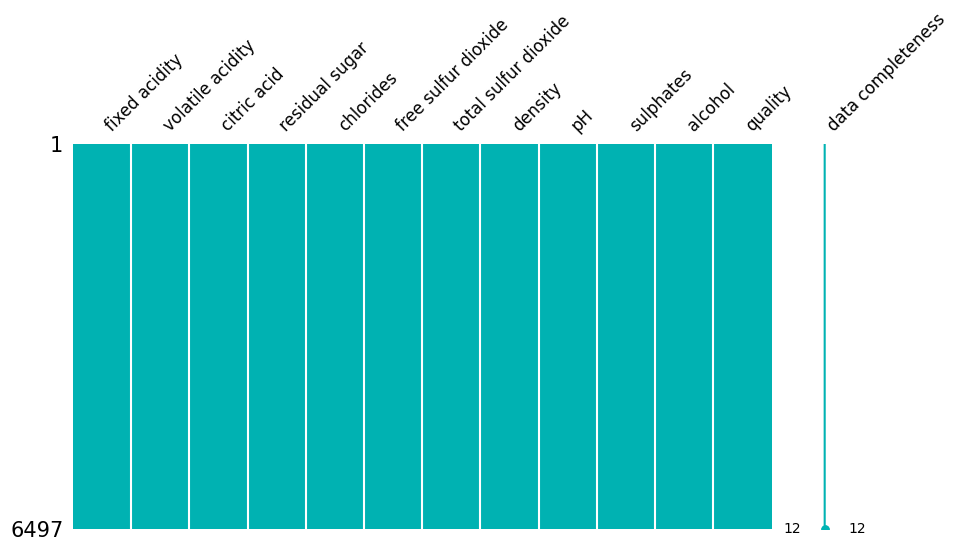

In [14]:
# missingno matrix plot for the dataset
# shows the missing values in the dataset using bar chart
msno.matrix(df,labels=[df.columns],figsize=(10,5),fontsize=12, color = (0.0, 0.7, 0.7))

From the above verfication steps, it was confirmed that -
- No missing values were found in the dataset — all features (6497 rows) are fully complete.
- The missingno.matrix plot confirms 100% data completeness across all columns.
- This ensures that no imputation or data cleaning is required for handling missing values.

## 2.3.2 Validate Value Ranges and Domain Logic
The dataset contains no negative values as confirmed by its column wise min values in previous steps. Though there were no negative values in the dataset, a programmatic verification would be conducted to ensure that the dataset contains realistic and logically consistent values. Even when no missing and negative valued data was present, a dataset may still include invalid or illogical values due to errors in data entry, measurement, or preprocessing. Identifying and handling such cases is crucial before moving forward with modeling or analysis.


1. In range verification, the negative value check for all columns and pH value(ideally 0-14) check will be conducted.
2. In Domain verification, the condition "Total sulfur dioxide >= free sulfur dioxide" will be checked


These checks would help identify outliers or incorrect entries (e.g., a negative alcohol value would clearly be invalid) along with data integrity issues.


### Negative Value Check

In [15]:
# Check for negative values in each column
pd.DataFrame(df[df < 0].count(), columns=["total"])

,total
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


So, the second verification process also confirmed the verdict of no negative value in any of the dataset columns.

### pH Range Verification

In [16]:
# Check for pH values outside the range 0-14
pd.DataFrame(df[df.pH > 14].count(), columns=["total"])

,total
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


<Axes: ylabel='Count'>

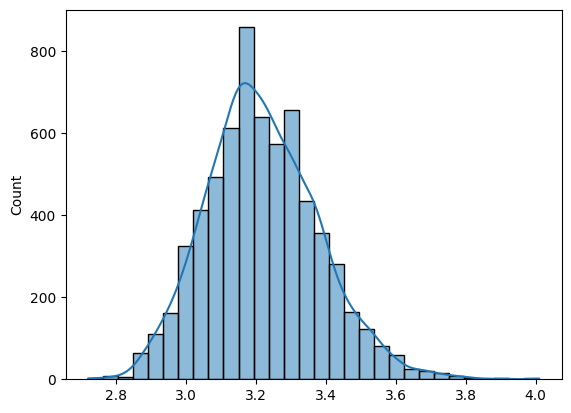

In [17]:
sns.histplot(df['pH'], bins=30, kde=True)

pH values were also in the ideal range of [0,14]. More specifically around in (2,4) range.

### <p style= "">Domain Verification</p>


In [18]:
# Domain Verification
# if free sulfur dioxide is greater than total sulfur dioxide, then it is an invalid point
invalid = df[df['free sulfur dioxide'] > df['total sulfur dioxide']]

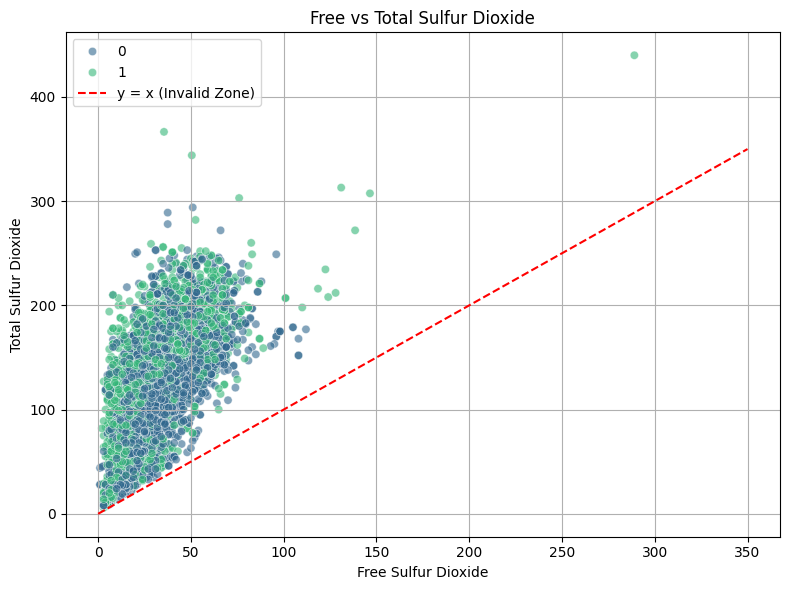

In [19]:
# set figure size
plt.figure(figsize=(8, 6))

# plot the scatter plot for free sulfur dioxide vs total sulfur dioxide
# hue is the quality of the wine
sns.scatterplot(data=df, x='free sulfur dioxide', y='total sulfur dioxide', hue='quality', palette='viridis', alpha=0.6)

# Add diagonal reference line (y = x)
# Add a small margin to force visual gap
plt.plot([0, 350], [0, 350], 'r--', label='y = x (Invalid Zone)', zorder=5)


# plot the invalid points in red
sns.scatterplot(x=invalid['free sulfur dioxide'], y=invalid['total sulfur dioxide'], color='red', label='Invalid Points', zorder=10)

plt.title('Free vs Total Sulfur Dioxide')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot visualized the relationship between Free Sulfur Dioxide and Total Sulfur Dioxide with each point representing an individual wine sample. A red dashed line representing the equation y = x is included to highlight the logical boundary where free sulfur dioxide should never exceed total sulfur dioxide. In a valid dataset, all points should lie on or above this line. As observed in the plot, it was concluded that -  

- No points appeared below the red line confirming that all entries comply with the expected chemical constraint(free sulfur dioxide is always less than or equal to total sulfur dioxide). 

- The dataset was logically consistent and did not contain errors in these two features.

## 2.3.3 Duplicate Entries

In [20]:
# function to find duplicates classwise
def duplicates(df):
    """
    This function finds the duplicates in the dataset and returns the duplicates classwise and the count of duplicates.
    Args:
        df: pandas dataframe
    Returns:
        identical_duplicates: all duplicates in sorted order
        duplicates_classwise_count: count of duplicates classwise
    """
    # find all duplicates in sorted order
    # keep=False means all duplicates are kept
    identical_duplicates = df[df.duplicated(keep=False)].sort_values(list(df.columns))

    # find duplicates classwise
    # subset=df.columns.difference(['quality']) means all columns except quality
    # keep=False means all duplicates are kept
    duplicates_classwise = df[df.duplicated(subset=df.columns.difference(['quality']), keep=False)]

    # count of duplicates classwise
    duplicates_classwise_count = duplicates_classwise['quality'].value_counts()

    return identical_duplicates, duplicates_classwise_count

identical_duplicates, duplicates_classwise_count = duplicates(df)

# print the duplicates_classwise_count
print(f"Number of duplicates for each class: {duplicates_classwise_count}")

identical_duplicates.head(10)


Number of duplicates for each class: quality
0    1417
1     755
Name: count, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2859,4.9,0.335,0.14,1.3,0.036,69.0,168.0,0.99212,3.47,0.46,10.466667,1
3099,4.9,0.335,0.14,1.3,0.036,69.0,168.0,0.99212,3.47,0.46,10.466667,1
2529,4.9,0.345,0.34,1.0,0.068,32.0,143.0,0.99138,3.24,0.40,10.100000,1
4725,4.9,0.345,0.34,1.0,0.068,32.0,143.0,0.99138,3.24,0.40,10.100000,1
76,5.0,0.270,0.32,4.5,0.032,58.0,178.0,0.98956,3.45,0.31,12.600000,0
4327,5.0,0.270,0.32,4.5,0.032,58.0,178.0,0.98956,3.45,0.31,12.600000,0
2228,5.0,0.330,0.16,1.5,0.049,10.0,97.0,0.99170,3.48,0.44,10.700000,0
2586,5.0,0.330,0.16,1.5,0.049,10.0,97.0,0.99170,3.48,0.44,10.700000,0
2683,5.0,0.330,0.16,1.5,0.049,10.0,97.0,0.99170,3.48,0.44,10.700000,0
4509,5.0,0.350,0.25,7.8,0.031,24.0,116.0,0.99241,3.39,0.40,11.300000,0


It was clearly notable that both the classes of quality contained a lot of duplicate entries.


- There were 1,417 duplicates in class 0 and 755 duplicates in class 1. 
- The table listed the examples of those identical rows where all the column wise values including class label were exactly the same.


Those duplicates might cause potential bias in model performance. Identifying and removing these duplicates is important for ensuring unbiased analysis and improving model reliability.

 For more visual understanding, a barplot was visualised with class-wise duplicate count.

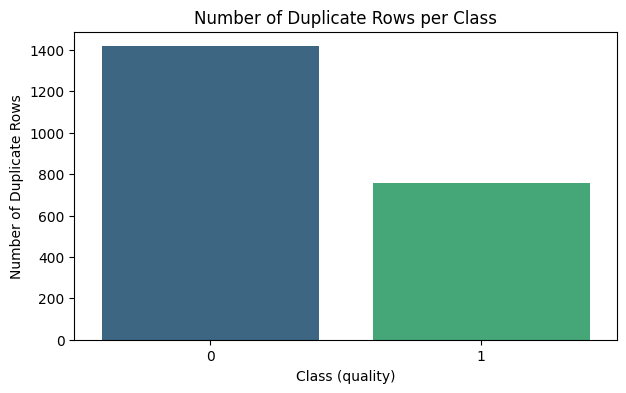

In [21]:
# plot the duplicates classwise
plt.figure(figsize=(7,4))
sns.barplot(x=duplicates_classwise_count.index, y=duplicates_classwise_count.values, palette = 'viridis')
plt.xlabel('Class (quality)')
plt.ylabel('Number of Duplicate Rows')
plt.title('Number of Duplicate Rows per Class')
plt.show()

### 2.3.1. Outliers <a class="anchor"></a>
At this stage, it was important to address any outliers in the dataset. Outliers could arise from data entry errors, unit inconsistencies or may represent rare but genuine cases. To systematically detect these,the modified Z-score method was utilised. This approach calculates how far each value is from the median of its feature which is scaled by the median absolute deviation (MAD). It is particularly effective for detecting unusual or extreme values, even when the data are skewed or contain existing outliers ensuring a more reliable assessment of data quality.
 
For a value x_i in a feature, Modified Z-score formula: <br>


M_i = 0.6745 * (x_i - median) / MAD
where:
* MAD(Median Absolute Deviation) = median(|x_i - median|)
* A common threshold for outliers is |M_i| > 3.5


The process was broken down into several steps:


1. Initially, the median value of each feature will be calculated using the numpy builtin method.
2. The MAD value will be calculated using median.
3. Finally, scatter plot of each feature as form of barplot will be visualised for better understanding.


In [50]:
def modified_z_score(feature):
    """
    Calculate the modified Z-score for a given feature.

    Args:
        feature: pandas Series of a feature

    Returns:
        pandas Series of the modified Z-score for the feature
    """

    # Calculate the median and MAD of the feature
    median = np.median(feature)
    mad = np.median(np.abs(feature - median))

    # Avoid division by zero
    if mad == 0:
        return np.zeros_like(feature)

    # Calculate the modified Z-score
    return 0.6745 * (feature - median) / mad


In [62]:
def outliers_count(df, features):
    """
    Count the number of outliers in the dataset for each feature.

    Args:
        df: pandas DataFrame containing the data
        features: list of feature names

    Returns:
        pandas DataFrame containing the number of outliers for each feature
    """
    # Calculate the modified Z-score for each feature
    mzs = df[features].apply(modified_z_score)

    # Create a mask for outliers using the threshold of 3.5
    outlier_mask = np.abs(mzs) > 3.5

    # Return the number of outliers for each feature
    return outlier_mask.sum()

# take the first 11 features excluding the target column
features = df.columns[0:11]
outlier_counts = outliers_count(df, features)

pd.DataFrame(outlier_counts, columns=['Outlier Counts'])

,Outlier Counts
fixed acidity,251
volatile acidity,233
citric acid,130
residual sugar,869
chlorides,293
free sulfur dioxide,26
total sulfur dioxide,3
density,3
pH,10
sulphates,111


The modified Z-score analysis revealed potential outliers all over the dataset. Key findings include-
- residual sugar had most outliers, followed by fixed acidity, volatile acidity and citric acid
- alcohol had no outliers and some features like free sulfur dioxide, total sulfur dioxide, density and pH had very few outlier points. 

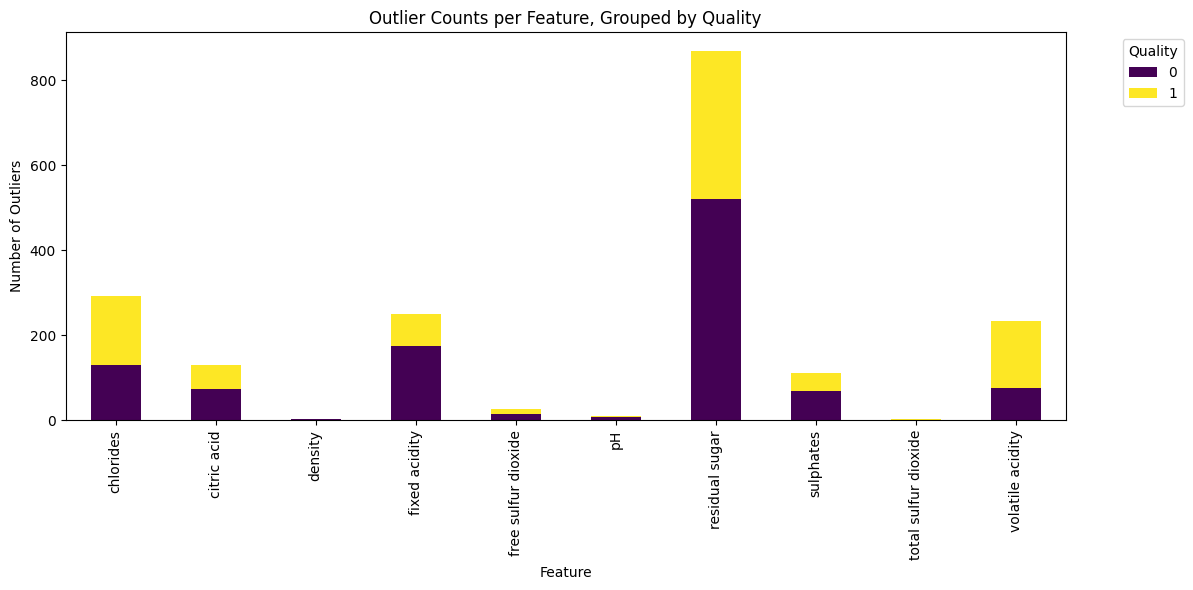

In [67]:
# calculate the modified Z-score for each feature
mzs = df[features].apply(modified_z_score)

# create a mask for the outliers
outlier_mask = np.abs(mzs) > 3.5

# outlier mask to long form for grouping with value as is_outlier
# add the quality column to the outlier mask using the index of mask
outlier_long = outlier_mask.reset_index().melt(id_vars='index', var_name='feature', value_name='is_outlier')
outlier_long['quality'] = df.loc[outlier_long['index'], 'quality'].values

# group the outliers by feature and quality
# count the number of outliers for each feature and quality
# unstack the counts to get a DataFrame with features as columns and qualities as rows
counts = (
    outlier_long[outlier_long['is_outlier']]
    .groupby(['feature', 'quality'])
    .size()
    .unstack(fill_value=0)
)

# --- Plot ---
counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Outlier Counts per Feature, Grouped by Quality')
plt.xlabel('Feature')
plt.ylabel('Number of Outliers')
plt.legend(title='Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

`The plot showed class-wise outliers count. It was highlighted that class 0(good quality) had more outliers across the features except volatile acidity.`

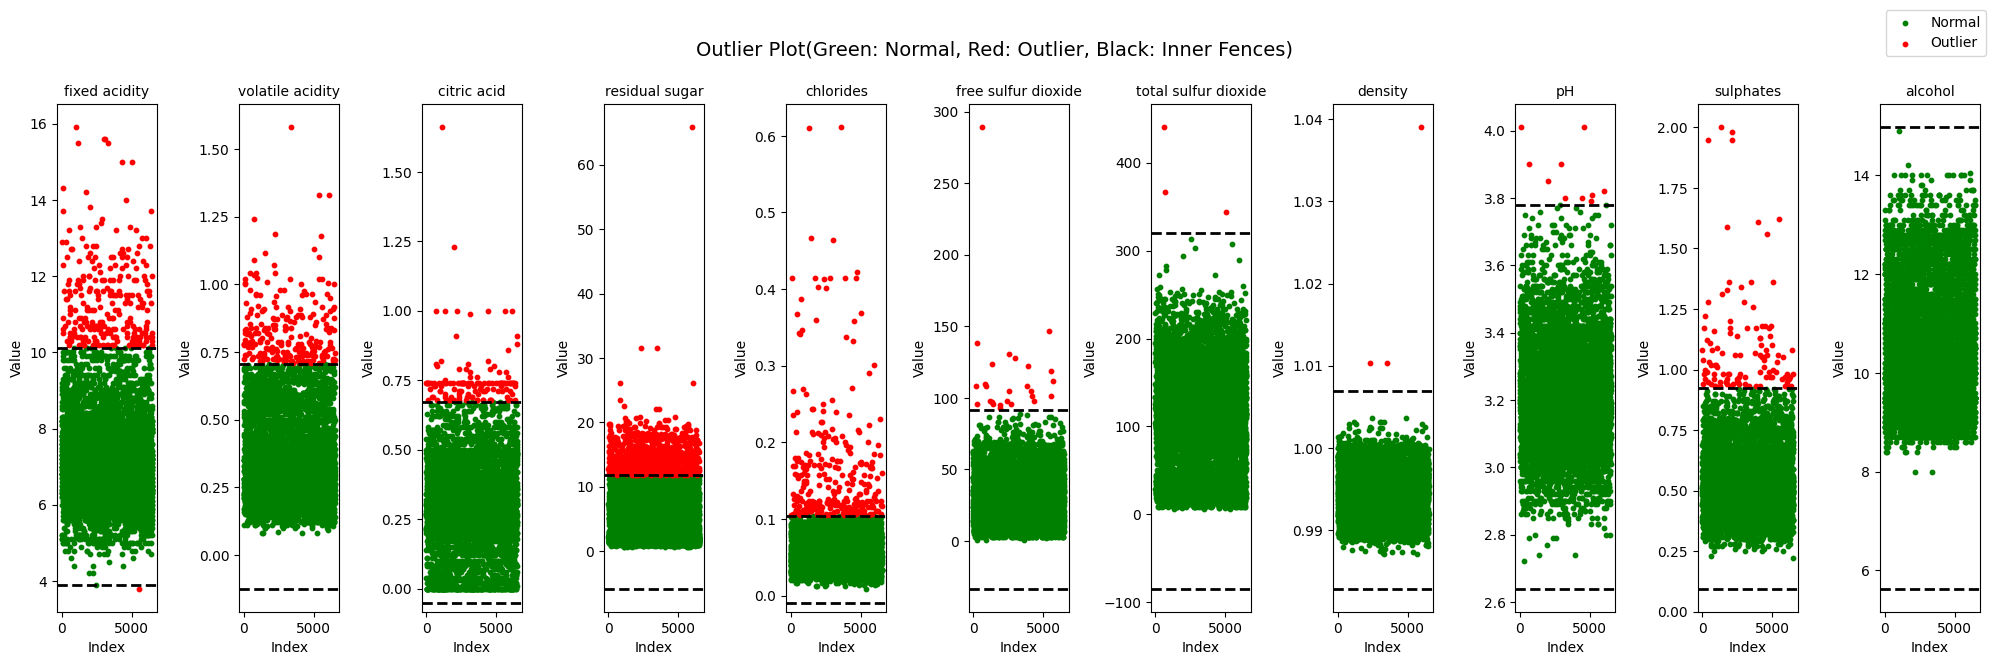

In [82]:
def plot_outliers(df, features):
    """
    Plot the outliers for each feature in the dataset.

    Args:
        df: pandas DataFrame containing the data
        features: list of feature names
    """

    # set the figure size
    plt.figure(figsize=(20, 6))

    # iterate over the features
    for idx, feature in enumerate(features):
        # create a subplot for each feature
        plt.subplot(1, len(features), idx+1)

        # calculate the modified Z-score for the feature
        mzs = modified_z_score(df[feature])

        # create a mask for the outliers
        outlier_mask = np.abs(mzs) > 3.5

        # plot the outliers
        # Green: normal, Red: outlier for each feature
        # Black: inner fences
        plt.scatter(df.index[~outlier_mask], df[feature][~outlier_mask], color='green', s=10, label='Normal')
        plt.scatter(df.index[outlier_mask], df[feature][outlier_mask], color='red', s=10, label='Outlier')
        


        # plot the inner fences using modified Z-score threshold is 3.5 
        plt.axhline(np.median(df[feature]) + 3.5 * (np.median(np.abs(df[feature] - np.median(df[feature]))) / 0.6745), color='black', linestyle='--', linewidth=2)
        plt.axhline(np.median(df[feature]) - 3.5 * (np.median(np.abs(df[feature] - np.median(df[feature]))) / 0.6745), color='black', linestyle='--', linewidth=2)

        # plot the title, xlabel, ylabel
        plt.title(feature, fontsize=10)
        plt.xlabel("Index")
        plt.ylabel("Value")
        plt.tight_layout()

    plt.legend(loc='upper right', bbox_to_anchor=(1.13, 1.2), fontsize=10)
    plt.suptitle("Outlier Plot(Green: Normal, Red: Outlier, Black: Inner Fences)", y=1.05, fontsize=14)
    plt.show()


plot_outliers(df, features)


`Findings`
-	Red points are outliers (outside the black dashed inner fences); green points are normal values.
-	Most features have a cluster of outliers at the upper extreme for example, fixed acidity, volatile acidity, residual sugar, chlorides, sulphates.
-	Outliers are especially prominent in features like residual sugar, chlorides and fixed/volatile acidity
-	Some features such as density and alcohol have few or no outliers.
-	The inner fence lines (black dashed) effectively highlight the cutoff for identifying outliers.

Overall, outliers are mostly found at the high end for several features indicating potential extreme values or rare cases in the dataset.

## 2.4 Initial Data Exploration  <a class="anchor"></a>
During this stage, address data questions using querying, data visualization and reporting techniques. These may include:

- **Distribution** of key attributes (for example, the target attribute of a prediction task)
- **Relationships** between pairs or small numbers of attributes
- Results of **simple aggregations**
- **Properties** of significant sub-populations
- **Simple** statistical analyses

These analyses may contribute to or refine the data description and quality aspects of your report, and feed into other data preparation steps needed for further analysis. 

- **Data exploration component of your report** - Describe results of your data exploration, including first findings or initial hypothesis and their impact on the remainder of the project. Include graphs and plots here to indicate data characteristics that suggest further examination of interesting data subsets.

### 2.4.1 Distributions  <a class="anchor"></a>

In [26]:
def count_values_table(df):
        count_val = df.value_counts()
        count_val_percent = 100 * df.value_counts() / len(df)
        count_val_table = pd.concat([count_val, count_val_percent.round(1)], axis=1)
        count_val_table_ren_columns = count_val_table.rename(
        columns = {0 : 'Count Values', 1 : '% of Total Values'})
        return count_val_table_ren_columns

In [27]:
# Histogram
def hist_chart(df, col):
        plt.style.use('fivethirtyeight')
        plt.hist(df[col].dropna(), edgecolor = 'k');
        plt.xlabel(col); plt.ylabel('Number of Entries'); 
        plt.title('Distribution of '+col);

In [28]:
# col = 'account_risk_band'
# Histogram & Results
# hist_chart(df, col)
# count_values_table(df.account_risk_band)

### 2.4.2 Correlations  <a class="anchor"></a>
Can we derive any correlation from this data-set. Pairplot chart gives us correlations, distributions and regression path
Correlogram are awesome for exploratory analysis. It allows to quickly observe the relationship between every variable of your matrix. 
It is easy to do it with seaborn: just call the pairplot function

Pairplot documentation is found here: https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [29]:
#Seaborn allows to make a correlogram or correlation matrix really easily. 
#sns.pairplot(df.dropna().drop(['x'], axis=1), hue='y', kind ='reg')

#plt.show()


In [30]:
#df_agg = df.drop(['x'], axis=1).groupby(['y']).sum()
#df_agg = df.groupby(['y']).sum()

# 3. Stage Three - Data Preparation <a class="anchor"></a>
This is the stage of the project where you decide on the data that you're going to use for analysis. The criteria you might use to make this decision include the relevance of the data to your data mining goals, the quality of the data, and also technical constraints such as limits on data volume or data types. Note that data selection covers selection of attributes (columns) as well as selection of records (rows) in a table.

## 3.1 Select Your Data <a class="anchor"></a>
This is the stage of the project where you decide on the data that you're going to use for analysis. The criteria you might use to make this decision include the relevance of the data to your machine learning goal, the quality of the data, and also technical constraints such as limits on data volume or data types. Note that data selection covers selection of attributes (columns) as well as selection of records (rows) in a table.

Rationale for inclusion/exclusion - List the data to be included/excluded and the reasons for these decisions.

In [31]:
X_train_regr = df.drop(['date_maint', 'account_open_date'], axis = 1)
X_train = df.drop(['target', 'date_maint', 'account_open_date'], axis = 1)
X_test = test.drop(['date_maint', 'account_open_date'], axis = 1)

KeyError: "labels Index(['account_open_date', 'date_maint'], dtype='object') not contained in axis"

## 3.2 Clean The Data <a class="anchor"></a>
This task involves raising the data quality to the level required by the analysis techniques that you've selected. This may involve selecting clean subsets of the data, the insertion of suitable defaults, or more ambitious techniques such as the estimation of missing data by modelling.

# 4. Stage Four - Modelling <a class="anchor"></a>
As the first step in modelling, you'll select the actual modelling technique that you'll be using e.g.Decision tree
  


## 4.1. Modelling technique <a class="anchor"></a>
Document the actual modelling technique that is to be used.

Import Models in your code below:

## 4.2. Modelling assumptions <a class="anchor"></a>
Many modelling techniques make specific assumptions about the data, for example that all attributes have uniform distributions, no missing values allowed, class attribute must be symbolic etc. Record any assumptions made.


## 4.3. Build Model <a class="anchor"></a>
Run the modelling tool on the prepared dataset to create your model.

**Parameter settings** - With any modelling tool there are often a large number of parameters that can be adjusted. List the parameters and their chosen values, along with the rationale for the choice of parameter settings.

**Model** - This is the actual model produced by the modelling tool, not a report on the model.

**Model description** - Describe the resulting model, report on the interpretation of the model and document any difficulties encountered with their meanings.

## 4.4. Assess Model <a class="anchor"></a>
Interpret the models according to your knowledge, your prediction success criteria and your desired test design. Judge the success of the application of modelling and discovery techniques technically to discuss the machine learning results in the business context. This task only considers models, whereas the evaluation phase also takes into account all other results that were produced in the course of the project.

At this stage you should rank the models and assess them according to the evaluation criteria. You should take the business objectives and business success criteria into account as far as you can here. In most ML projects a single technique is applied more than once and results are generated with several different techniques. 

**Model assessment** - Summarise the results of this task, list the qualities of your generated models (e.g.in terms of accuracy) and rank their quality in relation to each other.

**Revised parameter settings** - According to the model assessment, revise parameter settings and tune them for the next modelling run. Iterate model building and assessment until you strongly believe that you have found the best model. Document all such revisions and assessments.

# 5. Stage 5 - Evaluate  <a class="anchor"></a>
Previous steps deal with the accuracy and generality of the model. During this step you should assesses the degree to which the model meets your business objectives and seek to determine if there is some business reason why this model is deficient. 

Assessment of machine learning results - Summarise assessment results in terms of business success criteria, including a final statement regarding whether the project meets the initial business objectives.
Approved models - After assessing models with respect to business success criteria, the generated models that meet the selected criteria become the approved models. For this initial assessment, you are only required to consider one model.

# 6. Stage 6 - Deploy  <a class="anchor"></a>

In the deployment stage you would determine a strategy for their deployment and document here together with ongoing monitoring and maintenance of your model. This is particularly important as a predictive machine learning model significantly impacts business operations. For the purposes of this assessment we will use this section to conclude the report. The previous steps should contain your code and narrative text inserted at the relevant sections. Here, you should look at lessons learnt. This includes the things that went right, what went wrong, what you did well and areas for improvement. Additionally, summarise any other expereinces during the project.   

